In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import tools needed for visualization

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
################################################################################

In [4]:
df = pd.read_csv('Global_Landslide_Final.csv')
df.shape 

(9132, 22)

In [5]:
df.head(5)

,landslide_trigger,event_id,formatted_date,event_date,event_month,event_day,event_time,event_title,event_description,location_description,...,landslide_size,fatality_count,injury_count,country_name,country_code,population,gazeteer_closest_point,gazeteer_distance,longitude,latitude
0,Construction,7544,7/14/2015 23:00,7/14/2015,7,14,23:00,Highbury Rd and Huntingdale Rd,WITNESSES have detailed the dramatic moment th...,Highbury Rd and Huntingdale Rd,...,small,NaN,NaN,Australia,AU,11886.0,Burwood,0.77420,145.1147,-37.8558
1,Construction,7616,8/6/2015 0:00,8/6/2015,8,6,9:00,Atlanta Point,"The PBMC Chairperson, Mr. Armugam has made an ...",Atlanta Point,...,medium,0.0,0.0,India,IN,112050.0,Port Blair,0.96496,92.7490,11.6753
2,Construction,9558,9/27/2016 0:00,9/27/2016,9,27,0:00,Basaksehir district,People had been working both at the top and at...,Basaksehir district,...,medium,0.0,0.0,Turkey,TR,193750.0,BaÅŸakÅŸehir,2.78453,28.7701,41.0863
3,Construction,6480,8/12/2014 0:00,8/12/2014,8,12,2:30,the metro bus flyover project in Sector G9,The labourers were busy in work on the metro b...,the metro bus flyover project in Sector G9,...,small,2.0,4.0,Pakistan,PK,601600.0,Islamabad,3.05654,73.0399,33.6941
4,Construction,6030,5/17/2014 0:00,5/17/2014,5,17,9:00,Dariali Gorge,A landslide in the Dariali Gorge in Georgia ha...,Dariali Gorge,...,medium,8.0,0.0,Georgia,GE,2628.0,Stepâ€™antsminda,9.57790,44.5015,42.7204


In [6]:
df.tail()

,landslide_trigger,event_id,formatted_date,event_date,event_month,event_day,event_time,event_title,event_description,location_description,...,landslide_size,fatality_count,injury_count,country_name,country_code,population,gazeteer_closest_point,gazeteer_distance,longitude,latitude
9127,Tropical_Cyclone,1079,8/10/2009 0:00,8/10/2009,8,10,0:00,"Alishan, central Taiwan","The storm destroyed the homes of 7,000 people ...","Alishan, central Taiwan",...,large,0.0,NaN,Taiwan,TW,0.0,Jiayi Shi,34.24073,120.7803,23.4333
9128,Tropical_Cyclone,7637,8/8/2015 0:00,8/8/2015,8,8,0:00,Wenzhou city in the province of Zhejiang,Twelve of the casualties were reported in and ...,Wenzhou city in the province of Zhejiang,...,large,0.0,0.0,China,CN,0.0,Louqiao,2.04056,120.6168,27.9982
9129,Tropical_Cyclone,1083,8/10/2009 0:00,8/10/2009,8,10,0:00,Chiayi county,Article only lists places where landslides wer...,Chiayi county,...,large,NaN,NaN,Taiwan,TW,0.0,Jiayi Shi,13.02540,120.5742,23.4575
9130,Tropical_Cyclone,1082,8/10/2009 0:00,8/10/2009,8,10,0:00,Tainan county,Article only lists places where landslides wer...,Tainan county,...,large,NaN,NaN,Taiwan,TW,0.0,Xinying,14.68538,120.2974,23.1749
9131,Tropical_Cyclone,1080,8/10/2009 0:00,8/10/2009,8,10,0:00,Namsha in Kaohsiung,An aerial view of a mudslide-hit area in Namsh...,Namsha in Kaohsiung,...,large,NaN,NaN,Taiwan,TW,1519711.0,Kaohsiung,6.82091,120.2858,22.6723


In [7]:
df.landslide_trigger.unique() 

array(['Construction', 'Earthquake', 'Flooding', 'Mining', 'Monsoon',
       'Rain', 'Snow', 'Tropical_Cyclone'], dtype=object)

In [8]:
df = df.drop(columns=['formatted_date','event_date','event_day','event_title',
                      'event_id','event_description','location_description',
                      'location_accuracy','gazeteer_closest_point', 'country_code','gazeteer_distance'])
df = df.dropna(subset=['landslide_trigger'])

In [9]:
df['fatality_count'].fillna((df['fatality_count'].median()), inplace=True)
df['injury_count'].fillna((df['injury_count'].median()), inplace=True)
df['population'].fillna((df['population'].median()), inplace=True)

In [10]:
df.isnull().sum()

landslide_trigger        0
event_month              0
event_time             397
landslide_category       0
landslide_size           0
fatality_count           0
injury_count             0
country_name          1160
population               0
longitude                0
latitude                 0
dtype: int64

In [11]:
# Delete attribute values that we don't want to classify:
df = df[df.landslide_size != "catastrophic"]
df = df[df.landslide_category != "unknown"]
df = df[df.landslide_category != "other"]
df = df[df.country_name != "NaN"]

In [12]:
df['event_time'] = df['event_time'].replace('unknown', 'NaN')

In [13]:
# Update landlside size values so reduce unnessessary unique values
df['landslide_size'] = df['landslide_size'].replace('very_large', 'large')
print('Landslide triggers:', df.landslide_trigger.unique())

Landslide triggers: ['Construction' 'Earthquake' 'Flooding' 'Mining' 'Monsoon' 'Rain' 'Snow'
 'Tropical_Cyclone']


Rain                7964
Tropical_Cyclone     562
Snow                 133
Monsoon              129
Mining                93
Earthquake            89
Construction          86
Flooding              74
Name: landslide_trigger, dtype: int64

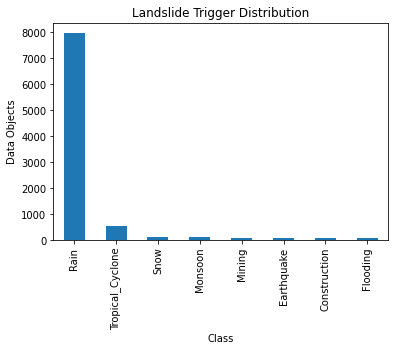

In [14]:
# Print graph showing imbalanced data:
pd.value_counts(df['landslide_trigger']).plot.bar()
plt.title('Landslide Trigger Distribution')
plt.xlabel('Class')
plt.ylabel('Data Objects')
df['landslide_trigger'].value_counts()

In [15]:
df.head()

,landslide_trigger,event_month,event_time,landslide_category,landslide_size,fatality_count,injury_count,country_name,population,longitude,latitude
0,Construction,7,23:00,slide,small,0.0,0.0,Australia,11886.0,145.1147,-37.8558
1,Construction,8,9:00,slide,medium,0.0,0.0,India,112050.0,92.7490,11.6753
2,Construction,9,0:00,rock_fall,medium,0.0,0.0,Turkey,193750.0,28.7701,41.0863
3,Construction,8,2:30,slide,small,2.0,4.0,Pakistan,601600.0,73.0399,33.6941
4,Construction,5,9:00,slide,medium,8.0,0.0,Georgia,2628.0,44.5015,42.7204


In [16]:
# Make sure all categorical data is string value only
df['event_time'] = df['event_time'].astype(str)
df['landslide_category'] = df['landslide_category'].astype(str) 
df['country_name'] = df['country_name'].astype(str) #make sure all country name values are strings

In [17]:
df['country_name'].value_counts()


United States            1917
India                    1227
nan                      1158
Philippines               667
Nepal                     428
                         ... 
Republic of the Congo       1
Swaziland                   1
Morocco                     1
Sudan                       1
Montenegro                  1
Name: country_name, Length: 111, dtype: int64

In [18]:
# Label Encode our categorical data with dummy variables
df = pd.get_dummies(df, prefix=['landslide_category','landslide_size'], 
                    columns=['landslide_category','landslide_size'])

In [19]:
df.head()

,landslide_trigger,event_month,event_time,fatality_count,injury_count,country_name,population,longitude,latitude,landslide_category_complex,...,landslide_category_earth_fall,landslide_category_earth_flow,landslide_category_lahar,landslide_category_rock_fall,landslide_category_slide,landslide_category_snow_avalanche,landslide_size_large,landslide_size_medium,landslide_size_small,landslide_size_unknown
0,Construction,7,23:00,0.0,0.0,Australia,11886.0,145.1147,-37.8558,0,...,0,0,0,0,1,0,0,0,1,0
1,Construction,8,9:00,0.0,0.0,India,112050.0,92.7490,11.6753,0,...,0,0,0,0,1,0,0,1,0,0
2,Construction,9,0:00,0.0,0.0,Turkey,193750.0,28.7701,41.0863,0,...,0,0,0,1,0,0,0,1,0,0
3,Construction,8,2:30,2.0,4.0,Pakistan,601600.0,73.0399,33.6941,0,...,0,0,0,0,1,0,0,0,1,0
4,Construction,5,9:00,8.0,0.0,Georgia,2628.0,44.5015,42.7204,0,...,0,0,0,0,1,0,0,1,0,0


In [20]:
df.drop(['event_time','country_name'],axis=1,inplace=True)

In [21]:
df.to_csv("new.csv")

In [22]:
# Label Encode our trigger values into numbers
df["landslide_trigger"] = df["landslide_trigger"].astype('category')
df["landslide_trigger"] = df["landslide_trigger"].cat.codes
df.head(5)

,landslide_trigger,event_month,fatality_count,injury_count,population,longitude,latitude,landslide_category_complex,landslide_category_creep,landslide_category_debris_flow,landslide_category_earth_fall,landslide_category_earth_flow,landslide_category_lahar,landslide_category_rock_fall,landslide_category_slide,landslide_category_snow_avalanche,landslide_size_large,landslide_size_medium,landslide_size_small,landslide_size_unknown
0,0,7,0.0,0.0,11886.0,145.1147,-37.8558,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,8,0.0,0.0,112050.0,92.7490,11.6753,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,9,0.0,0.0,193750.0,28.7701,41.0863,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,8,2.0,4.0,601600.0,73.0399,33.6941,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,5,8.0,0.0,2628.0,44.5015,42.7204,0,0,0,0,0,0,0,1,0,0,1,0,0


In [23]:
# Split our labels into their own array
Y = np.array(df['landslide_trigger'])  # values we want to predict
# Remove the labels from the features, axis 1 refers to the col
df = df.drop('landslide_trigger',axis=1)

In [24]:
df.columns

Index(['event_month', 'fatality_count', 'injury_count', 'population',
       'longitude', 'latitude', 'landslide_category_complex',
       'landslide_category_creep', 'landslide_category_debris_flow',
       'landslide_category_earth_fall', 'landslide_category_earth_flow',
       'landslide_category_lahar', 'landslide_category_rock_fall',
       'landslide_category_slide', 'landslide_category_snow_avalanche',
       'landslide_size_large', 'landslide_size_medium', 'landslide_size_small',
       'landslide_size_unknown'],
      dtype='object')

In [25]:
# Save the column headers 
feature_list = list(df.columns)
X = df.values # Holds our data objects and attributes

In [26]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size =.20)

In [27]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7304, 19)
Training Labels Shape: (7304,)
Testing Features Shape: (1826, 19)
Testing Labels Shape: (1826,)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [29]:
sd=RandomForestClassifier()
sd.fit(train_features,train_labels)
sd.score(test_features,test_labels)

0.8893756845564075

In [30]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    recall = 100 * recall_score(test_labels, predictions, average='macro')
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Recall = {:0.2f}%.'.format(recall))
    return accuracy

In [31]:
rf_accuracy = evaluate(sd, test_features, test_labels)

Model Performance
Average Error: 0.2475 degrees.
Accuracy = -inf%.
Recall = 22.74%.


In [32]:
predictions=sd.predict(test_features)

In [33]:
def model_report(model_predictions):
    triggers = [0,1,2,3,4,5,6,7]
    print(classification_report(test_labels, model_predictions))
 

In [34]:
confusion=confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n%s" % confusion)

Confusion Matrix:
[[   0    0    0    0    0   15    0    0]
 [   0    2    0    0    0   17    0    0]
 [   0    0    0    0    0   17    0    0]
 [   0    0    0    2    0   12    0    0]
 [   0    0    0    0    1   29    0    0]
 [   0    1    1    0    1 1570    1   17]
 [   0    0    0    0    0   21    4    0]
 [   0    0    0    0    1   69    0   45]]


In [35]:
model_report(predictions)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.67      0.11      0.18        19
           2       0.00      0.00      0.00        17
           3       1.00      0.14      0.25        14
           4       0.33      0.03      0.06        30
           5       0.90      0.99      0.94      1591
           6       0.80      0.16      0.27        25
           7       0.73      0.39      0.51       115

    accuracy                           0.89      1826
   macro avg       0.55      0.23      0.28      1826
weighted avg       0.86      0.89      0.86      1826



In [36]:
en=sd.predict([[10,4.0,1.0,0.0,73.2242,35.2882,0,0,0,0,0,0,1,0,0,0,0,0,1]])
print(en)

[1]


In [37]:
if en==0:
    print("Construction")
elif en==1:
    print("Earthquake")
elif en==2:
    print("Flooding")
elif en==3:
    print("Mining")
elif en==4:
    print("Monsoon")
elif en==5:
    print("Rain")
elif en==6:
    print("Snow")
elif en==7:
    print("Tropical_Cyclone")

Earthquake


In [38]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.001, max_depth=1, n_estimators=100)
xgb_model.fit(train_features, train_labels)
print("accuracy of boosting model"+" "+str(xgb_model.score(test_features,test_labels)))

[18:21:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of boosting model 0.871303395399781


In [39]:
models = {
    DecisionTreeClassifier():'decision tree',
    RandomForestClassifier():'Random Forest',
    LogisticRegression():'logistic',
    SVC():'svm',
    
}
for m in models.keys():
    m.fit(train_features,train_labels)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(test_features,test_labels)*100,"%")

Accuracy Score for decision tree is :  84.77546549835706 %
Accuracy Score for Random Forest is :  89.1566265060241 %
Accuracy Score for logistic is :  74.58926615553122 %
Accuracy Score for svm is :  87.07557502738226 %


In [45]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))  
	level0.append(('rf', RandomForestClassifier())) 
	level0.append(('ds', DecisionTreeClassifier())) 
	

	# define meta learner model
	level1 = RandomForestClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [51]:
model=get_stacking()
model.fit(train_features,train_labels)
print("accuracy of stacking model"+" "+str(model.score(test_features,test_labels)))


accuracy of stacking model 0.8904709748083242


In [42]:
predict=model.predict(test_features)

In [43]:
print(classification_report(test_labels, predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.67      0.11      0.18        19
           2       0.00      0.00      0.00        17
           3       0.50      0.14      0.22        14
           4       0.50      0.03      0.06        30
           5       0.90      0.98      0.94      1591
           6       1.00      0.12      0.21        25
           7       0.71      0.46      0.56       115

    accuracy                           0.89      1826
   macro avg       0.53      0.23      0.27      1826
weighted avg       0.86      0.89      0.86      1826



In [44]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)
loaded_model = pickle.load(open("model.pkl", 'rb'))